In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

In [3]:
def organize_data():
    dfs = {}
    players = ['Chris', 'Arian', 'James', 'Harish', 'Daniel', 'Joey']
    for player in players:
        dfs[player] = pd.read_csv(player+'_fantasy.csv')
    dfs['league'] = pd.DataFrame()
    for player in players:
        dfs['league'] = pd.concat([dfs['league'], dfs[player]], ignore_index=True)
    return dfs

In [4]:
def make_plots(dfs={}):
    plt.figure(figsize=(8,6))
    sns.swarmplot('Player', 'FGM', data=dfs['league'])
    plt.title('FGM')
    
    plt.figure(figsize=(8,6))
    sns.swarmplot('Player', 'FG%', data=dfs['league'])
    plt.title('FG%')
    
    plt.figure(figsize=(8,6))
    sns.swarmplot('Player', 'FTM', data=dfs['league'])
    plt.title('FTM')
    
    plt.figure(figsize=(8,6))
    sns.swarmplot('Player', 'FT%', data=dfs['league'])
    plt.title('FT%')
    
    plt.figure(figsize=(8,6))
    sns.swarmplot('Player', '3PM', data=dfs['league'])
    plt.title('3PM')
    
    plt.figure(figsize=(8,6))
    sns.swarmplot('Player', '3P%', data=dfs['league'])
    plt.title('3P%')
    
    plt.figure(figsize=(8,6))
    sns.swarmplot('Player', 'OREB', data=dfs['league'])
    plt.title('OREB')
    
    plt.figure(figsize=(8,6))
    sns.swarmplot('Player', 'DREB', data=dfs['league'])
    plt.title('DREB')
    
    plt.figure(figsize=(8,6))
    sns.swarmplot('Player', 'AST', data=dfs['league'])
    plt.title('AST')
    
    plt.figure(figsize=(8,6))
    sns.swarmplot('Player', 'A/TO', data=dfs['league'])
    plt.title('A/TO')
    
    plt.figure(figsize=(8,6))
    sns.swarmplot('Player', 'STL', data=dfs['league'])
    plt.title('STL')
    
    
    plt.figure(figsize=(8,6))
    sns.swarmplot('Player', 'BLK', data=dfs['league'])
    plt.title('BLK')
    
    
    plt.figure(figsize=(8,6))
    sns.swarmplot('Player', 'TO', data=dfs['league'])
    plt.title('TO')
    
    
    plt.figure(figsize=(8,6))
    sns.swarmplot('Player', 'DD', data=dfs['league'])
    plt.title('DD')
    
    
    plt.figure(figsize=(8,6))
    sns.swarmplot('Player', 'TD', data=dfs['league'])
    plt.title('TD')
    
    plt.figure(figsize=(8,6))
    sns.swarmplot('Player', 'PTS', data=dfs['league'])
    plt.title('PTS')
    
    plt.figure(figsize=(8,6))
    for key, value in dfs.items():
        sns.distplot(value['FGM'], hist=False, label=key)
        plt.legend()
    plt.title('FGM')
    
    
    plt.figure(figsize=(8,6))
    for key, value in dfs.items():
        sns.distplot(value['FG%'], hist=False, label=key)
        plt.legend()
    plt.title('FG%')
    
    plt.figure(figsize=(8,6))
    for key, value in dfs.items():
        sns.distplot(value['FTM'], hist=False, label=key)
        plt.legend()
    plt.title('FTM')
    
    
    plt.figure(figsize=(8,6))
    for key, value in dfs.items():
        sns.distplot(value['FT%'], hist=False, label=key)
        plt.legend()
    plt.title('FT%')
    
    
    plt.figure(figsize=(8,6))
    for key, value in dfs.items():
        sns.distplot(value['3PM'], hist=False, label=key)
        plt.legend()
    plt.title('3PM')
    
    plt.figure(figsize=(8,6))
    for key, value in dfs.items():
        sns.distplot(value['3P%'], hist=False, label=key)
        plt.legend()
    plt.title('3P%')
    
    plt.figure(figsize=(8,6))
    for key, value in dfs.items():
        sns.distplot(value['OREB'], hist=False, label=key)
        plt.legend()
    plt.title('OREB')
    
    plt.figure(figsize=(8,6))
    for key, value in dfs.items():
        sns.distplot(value['DREB'], hist=False, label=key)
        plt.legend()
    plt.title('DREB')
    
    plt.figure(figsize=(8,6))
    for key, value in dfs.items():
        sns.distplot(value['AST'], hist=False, label=key)
        plt.legend()
    plt.title('AST')
    
    plt.figure(figsize=(8,6))
    for key, value in dfs.items():
        sns.distplot(value['A/TO'], hist=False, label=key)
        plt.legend()
    plt.title('A/TO')
    
    plt.figure(figsize=(8,6))
    for key, value in dfs.items():
        sns.distplot(value['STL'], hist=False, label=key)
        plt.legend()
    plt.title('STL')
    
    plt.figure(figsize=(8,6))
    for key, value in dfs.items():
        sns.distplot(value['BLK'], hist=False, label=key)
        plt.legend()
    plt.title('BLK')
    
    plt.figure(figsize=(8,6))
    for key, value in dfs.items():
        sns.distplot(value['TO'], hist=False, label=key)
        plt.legend()
    plt.title('TO')
    
    plt.figure(figsize=(8,6))
    for key, value in dfs.items():
        sns.distplot(value['DD'], hist=False, label=key)
        plt.legend()
    plt.title('DD')
    
    plt.figure(figsize=(8,6))
    for key, value in dfs.items():
        sns.distplot(value['PTS'], hist=False, label=key)
        plt.legend()
    plt.title('PTS')

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


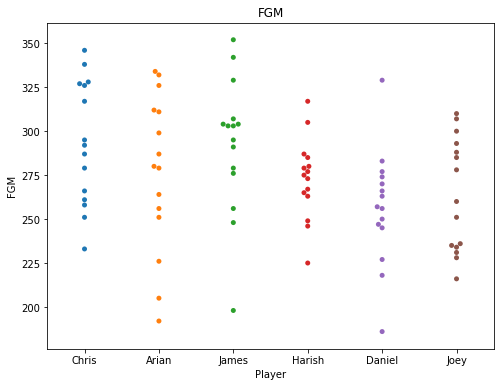

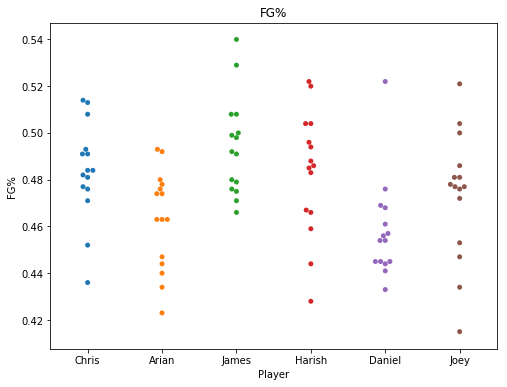

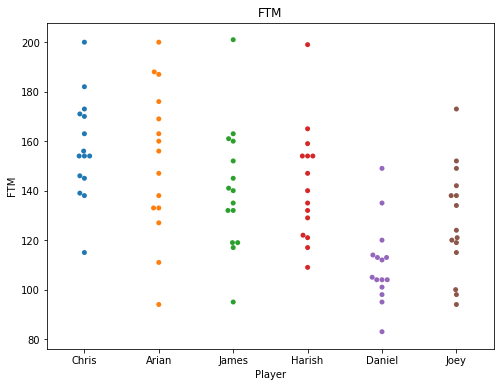

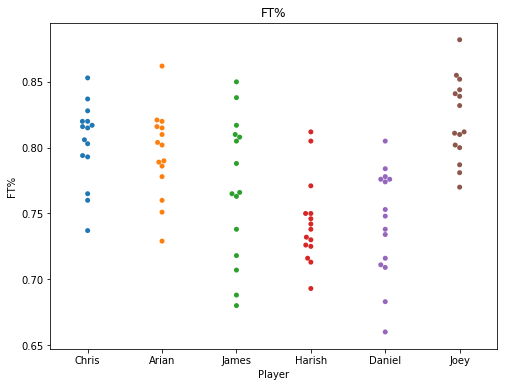

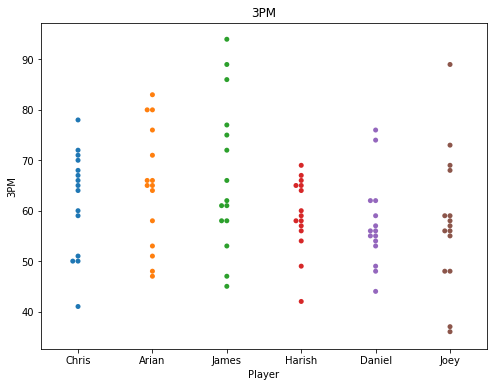

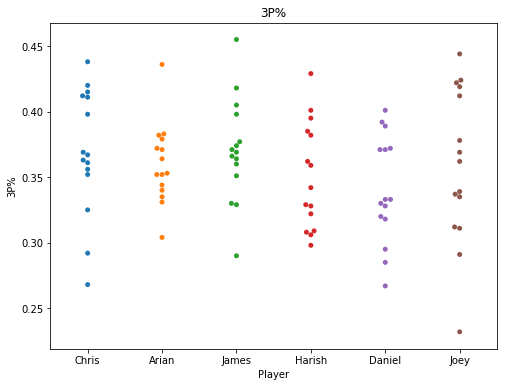

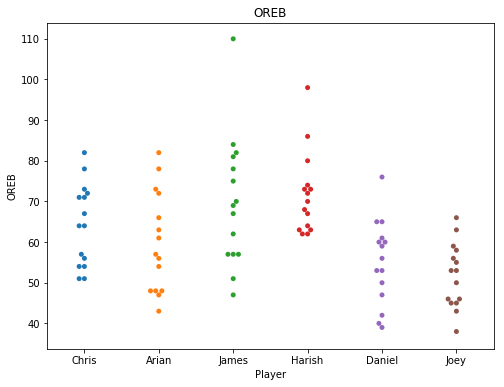

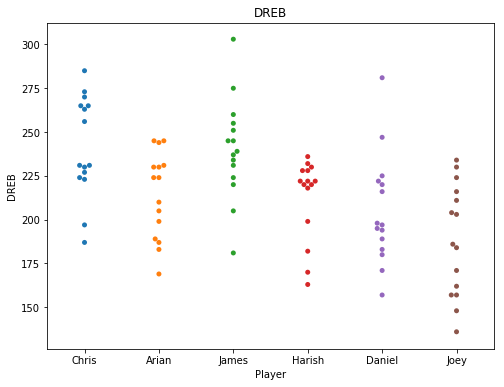

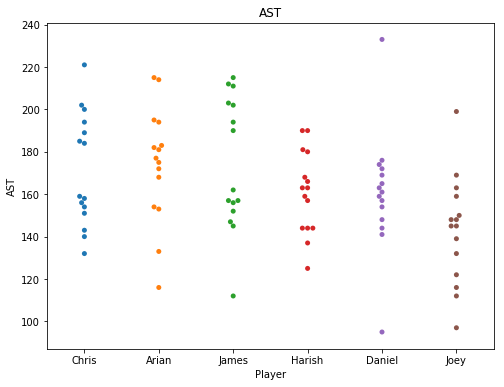

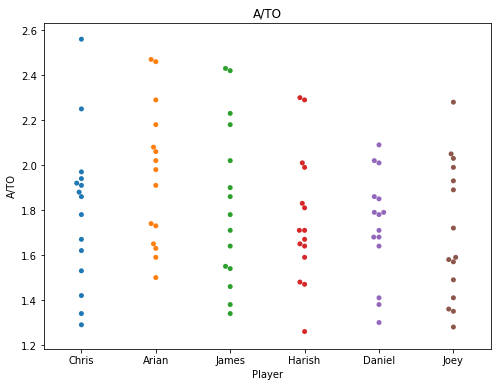

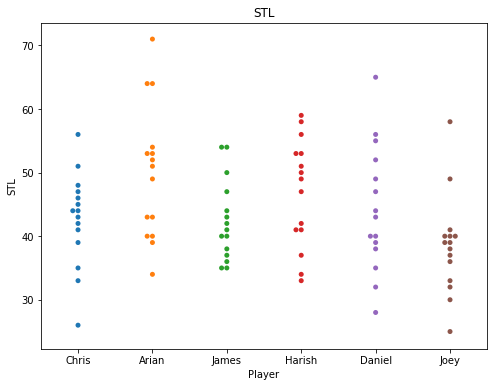

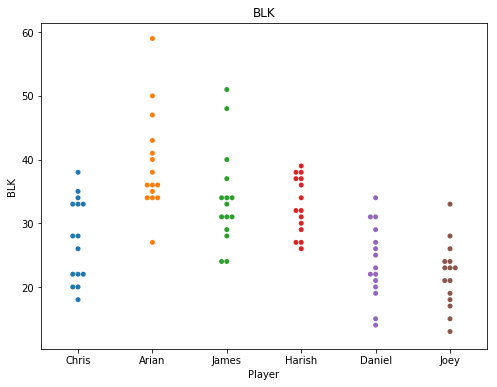

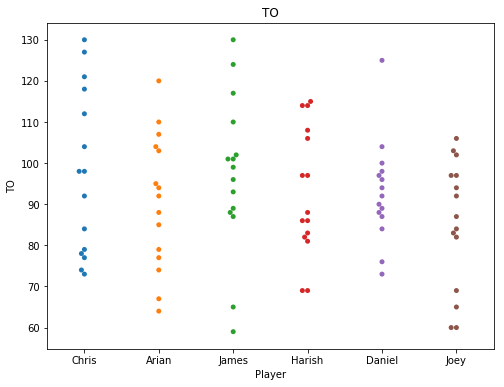

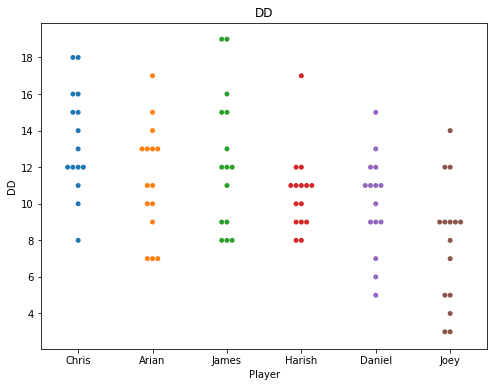

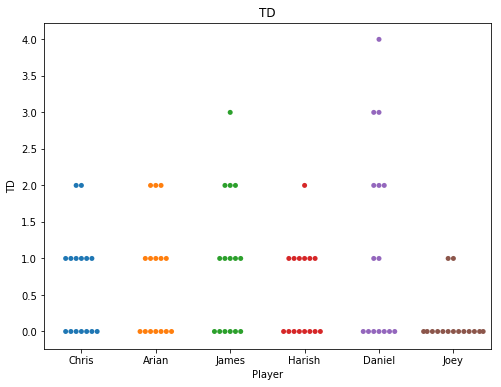

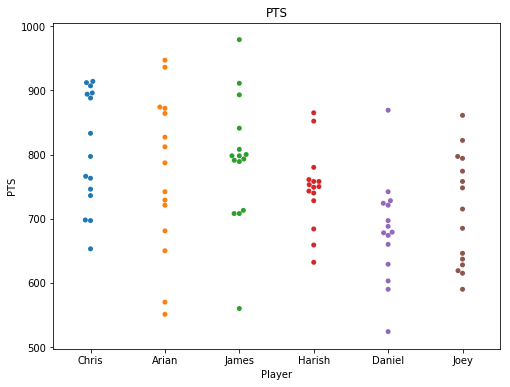

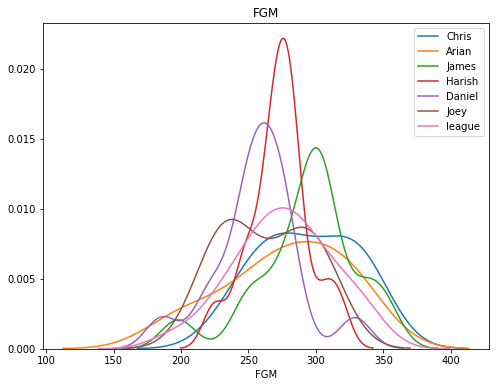

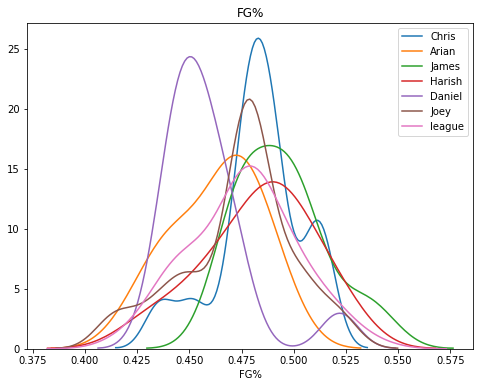

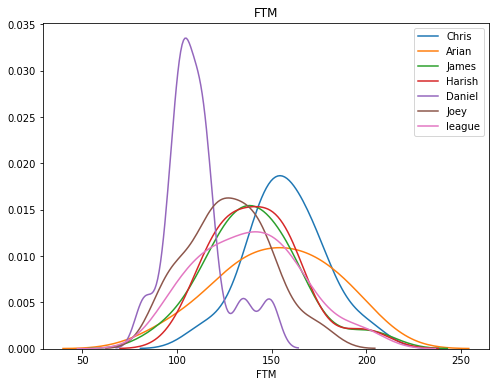

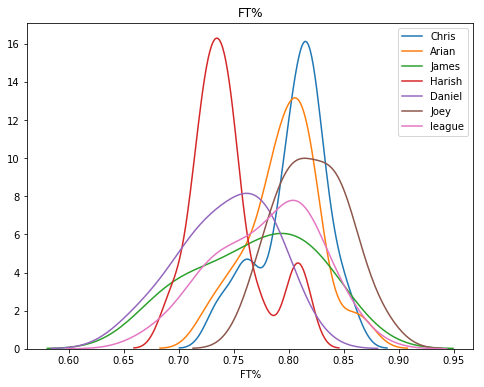

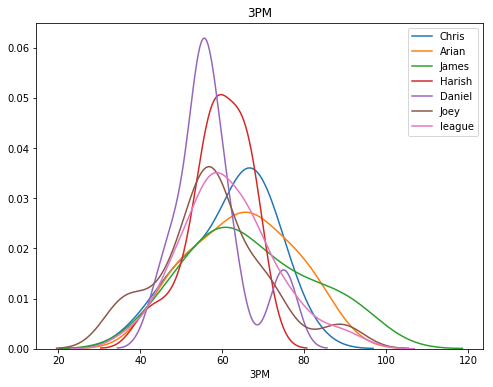

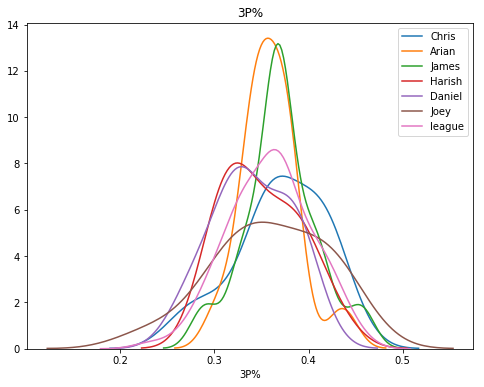

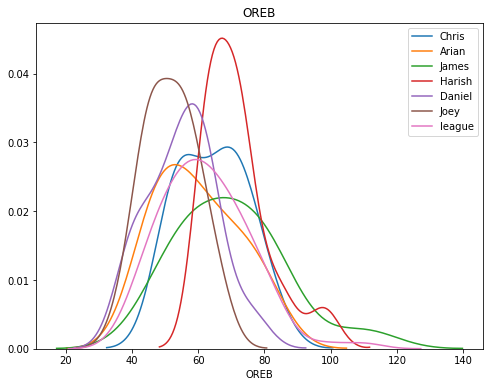

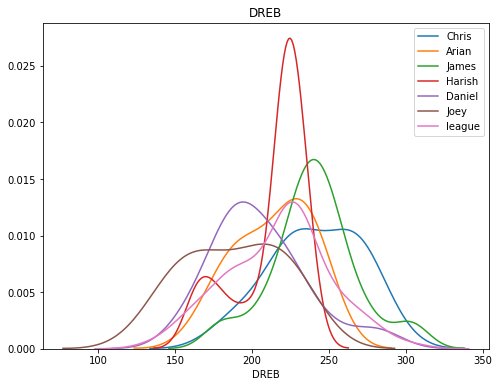

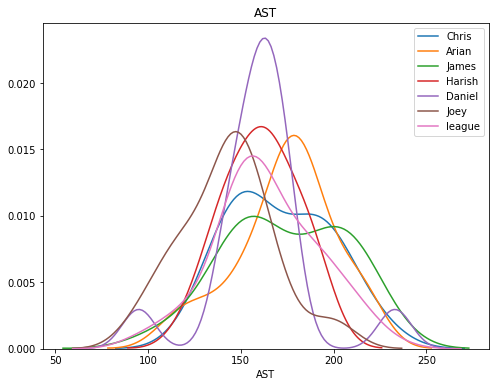

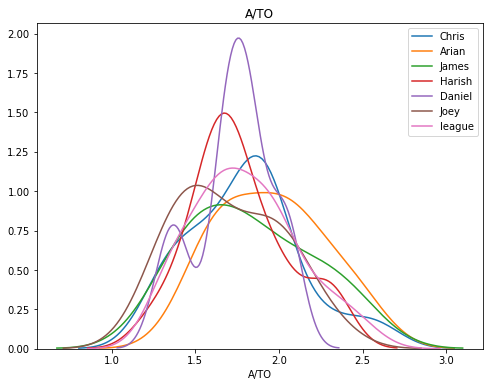

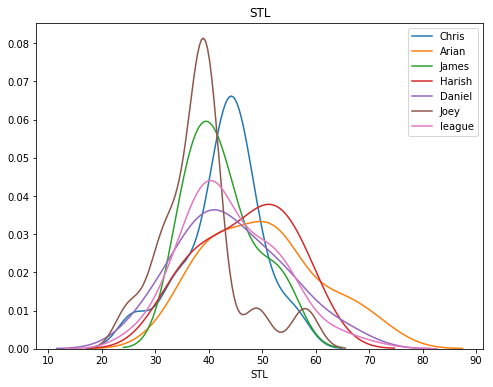

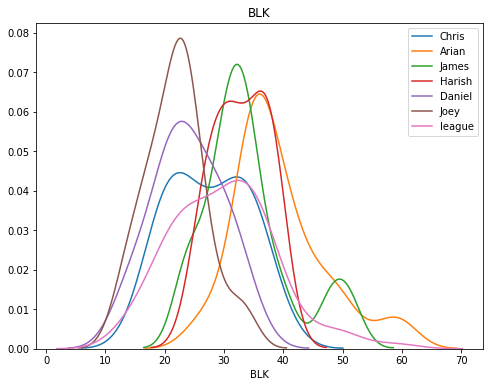

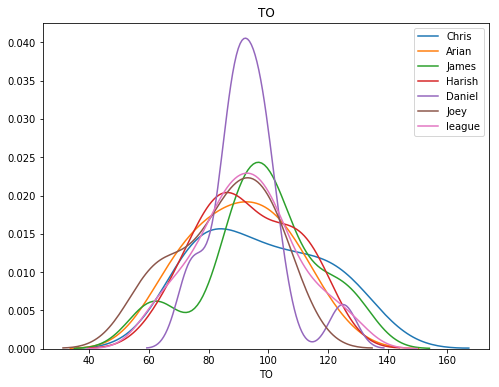

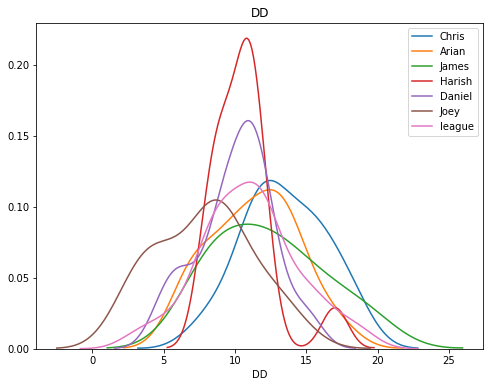

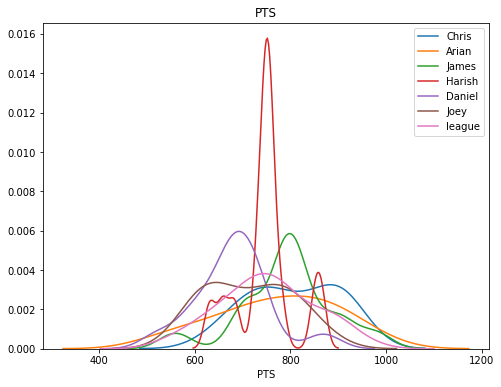

In [5]:
dfs = organize_data()
make_plots(dfs)